---
# <center> Hamiltoniano del sistema -- Minimal Models </center> 


\begin{eqnarray}
H(k) = \left[
\begin{array}{cc}
\frac{\gamma }{2}(e^{ik_xa}+e^{-ik_xa}-e^{ik_0a}-e^{-ik_0a})-\frac{t}{i}(e^{ik_za}-e^{-ik_za}) & 
-\frac{m}{2}(4-e^{ik_ya}-e^{-ik_ya}-e^{ik_za}-e^{-ik_za})+t_x(e^{ik_xa}+e^{-ik_xa}-e^{ik_0a}-e^{-ik_0a})+t(e^{ik_ya}-e^{-ik_ya})\\
-\frac{m}{2}(4-e^{ik_ya}-e^{-ik_ya}-e^{ik_za}-e^{-ik_za})+t_x(e^{ik_x}+e^{-ik_xa}-e^{ik_0a}-e^{-ik_0a})-t(e^{ik_ya}-e^{-ik_ya})&
\frac{\gamma }{2}(e^{ik_xa}+e^{-ik_xa}-e^{ik_0a}-e^{-ik_0a})+\frac{t}{i}(e^{ik_za}-e^{-ik_za})
\end{array}
\right]
\end{eqnarray}




\begin{eqnarray*}
H(k) = \left[
\begin{array}{cc}
\gamma (cos(k_xa)-cos(k_0a))-2t(sin(k_za) ) & -m(2-cos(k_ya)-cos(k_za))+2t_x(cos(k_xa)-cos(k_0a))+2it(sin(k_ya))\\-m(2-cos(k_ya)-cos(k_za))+2t_x(cos(k_xa)- cos(k_0a))-2it(sin(k_ya))& \gamma (cos(k_xa) -cos(k_0a))+2t(sin(k_za)) 
\end{array}
\right]
\end{eqnarray*}



In [1]:
from pythtb import *
from pylab import *


In [2]:
import glob
from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)
mpl.rcParams.update({'font.size': 22, 'text.usetex': True})
mpl.rcParams.update({'axes.linewidth':1.5})
mpl.rcParams.update({'axes.labelsize':'large'})
mpl.rcParams.update({'xtick.major.size':12})
mpl.rcParams.update({'xtick.minor.size':6})
mpl.rcParams.update({'ytick.major.size':12})
mpl.rcParams.update({'ytick.minor.size':6})
mpl.rcParams.update({'xtick.major.width':1.5})
mpl.rcParams.update({'xtick.minor.width':1.0})
mpl.rcParams.update({'ytick.major.width':1.5})
mpl.rcParams.update({'ytick.minor.width':1.0})

In [3]:
from palettable.cubehelix import Cubehelix
palette = Cubehelix.make(start=-0.5, rotation=0.3,reverse=True,n=10)


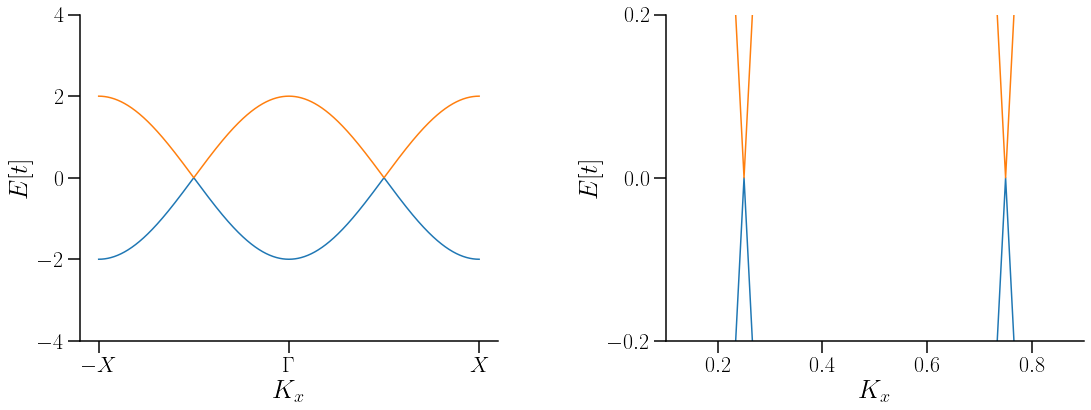

In [4]:
#Parámetros
a  = 1.0
k_0= pi/2
   
tx = 1   
t  = 1
m  = 2*t
γ  = 0

A_x= 0.0
A_y= +0.0
A_z= 0.0

##################----------------Inicia TB----------------##################
lat= [[a,0,0],[0,a,0],[0,0,a]]
orb= [[0,0,0],[1/2,1/2,1/2]] #H, solo los sitios A[000] B1/2[111]

WSH = tb_model(3,3,lat,orb)

#DIAGONAL
#γ*(cos(k_x)-cos(k_0))-2*t*sin(k_z)
# γ[coskx]
WSH.set_hop(γ/2, 0, 0,[1,0,0])#de que sitio a que sitio va el hoping, [la exp que lleva ese parametro], Conjugado ya no es 
# -2tsinkz                                #necesario, está implícito porque es Hermitiano.
WSH.set_hop(-t/1J, 0, 0,[0,0,1])

#Hermitiano [1,1]
WSH.set_hop(γ/2, 1, 1,[1,0,0])
WSH.set_hop(t/1J, 1, 1,[0,0,1])

WSH.set_onsite([-γ*cos(k_0)+A_z,-γ*cos(k_0)-A_z]) # No hay hooping, es energia

#FUERA DE LA DIAGONAL

# -[m*(2-cos(k_y)-cos(k_z))+2*tx*(cos(k_x)-cos(k_0))]+2J*t*sin(k_y)
#  2txcosk_0
WSH.set_hop(-2*m+2*(tx)*cos(k_0)+A_x, 0, 1,[0,0,0]) 
#mcosky+ 2itsin(ky)
WSH.set_hop(m/2+t, 0, 1,[0,1,0]) 
WSH.set_hop(m/2-t, 0, 1,[0,-1,0])
# mcoskz
WSH.set_hop(m/2, 0, 1,[0,0,1]) 
WSH.set_hop(m/2, 0, 1,[0,0,-1])
# tx(coskx)
WSH.set_hop(-tx+A_x, 0, 1,[1,0,0]) 
WSH.set_hop(-tx+A_x, 0, 1,[-1,0,0])


###############---------Inicia extraccion de información-----------##############
k=[[-0.5,0,0],[0,0,0.0],[0.5,0,0]] # Punto por los cuales que quiero que pase. Son los punto de al simetria
                                 #unidades en unidades de V de red 1=2pi/a
# k=[[0,-0.5,0],[0,0,0.0],[0.,0.5,0] ]
# k=[[0,0,-0.5],[0,0,0.0],[0.,0.,0.5]] 
    
k_label=[r"$-X$",r"$\Gamma$",r"$X$"]
(k_vec,k_dist,k_node)=WSH.k_path(k,1001,report=False)
Ek,ψ =WSH.solve_all(k_vec,eig_vectors=True)


#######################---Graficos----######################
 
fig,ax  = plt.subplots(ncols=2,nrows=1,figsize=(18,6),
                       gridspec_kw = {'wspace':0.4, 'hspace':0, 'width_ratios': [1, 1]})
ax[0].plot(k_dist,Ek[0,:],zorder=1,lw=1.5)
ax[0].plot(k_dist,Ek[1,:],zorder=1,lw=1.5)
ax[0].set_xticks(k_node) # puntos de alta simetria, valor que correspomde en k_path
ax[0].set_xticklabels(k_label )
ax[0].set_yticks([-4,-2,0.,2,4])
# xsticklabels(k_label) 

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].set_ylabel(r"$E[t]$",fontsize=26)
ax[0].set_xlabel(r"$K_x$",fontsize=26)

k=[[-0.5,0,0],[0,0,0.0],[0.5,0,0]]# Punto por los cuales que quiero que pase. Son los punto de al simetria
                                 #unidades en unidades de V de red 1=2pi/a

(k_vec,k_dist,k_node)=WSH.k_path(k,1001,report=False)
Ek,U=WSH.solve_all(k_vec,eig_vectors=True)
ax[1].plot(k_dist,Ek[0,:],zorder=1,lw=1.5)
ax[1].plot(k_dist,Ek[1,:],zorder=1,lw=1.5)
 # puntos de alta simetria, valor que correspomde en k_path

ax[1].set_yticks([-0.2,0.,0.2])
ax[1].set_ylim([-0.2,0.2])
ax[1].set_xlim([0.1,0.9])
# xsticklabels(k_label) 

ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].set_ylabel(r"$E[t]$",fontsize=26)
ax[1].set_xlabel(r"$K_x$",fontsize=26)

savefig("WSMMMBulkGapTI.pdf",bbox_inches='tight')


In [18]:
L= 100
NY_WSM=WSH.cut_piece(L,1,glue_edgs=False) 
NX_WSM=WSH.cut_piece(L,0,glue_edgs=False)
NZ_WSM=WSH.cut_piece(L,2,glue_edgs=False)

## Exploración de la estructura de bandas en distintos planos del material

In [20]:

k=[[0,0],[0.5,0],[1.0,0]]
k_label1=[r"$\Gamma$",r"$Y$",r"$\Gamma$"]
(k_vec,k_dist,k_node)=NX_WSM.k_path(k,501, report=False)
EkfinX10=NX_WSM.solve_all(k_vec)

k=[[0,0],[0,0.5],[0,1.0]]
k_label2=[r"$\Gamma$",r"$Z$",r"$\Gamma$"]
(k_vec,k_dist,k_node)=NY_WSM.k_path(k,501, report=False)
EkfinY10=NY_WSM.solve_all(k_vec)

k=[[0,0],[0.5,0],[1.0,0]]
k_label3=[r"$\Gamma$",r"$X$",r"$\Gamma$"]
(k_vec,k_dist,k_node)=NZ_WSM.k_path(k,501, report=False)
EkfinZ10=NZ_WSM.solve_all(k_vec)

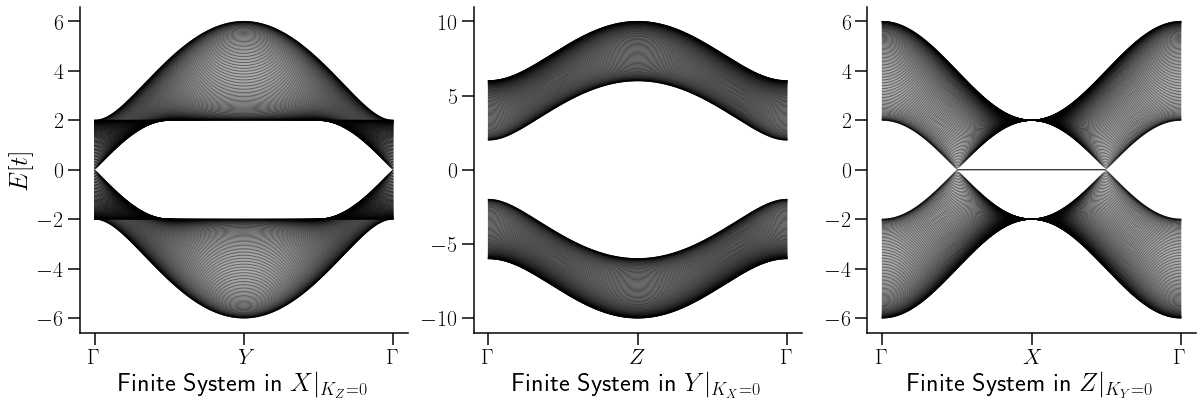

In [21]:
fig,ax  = plt.subplots(ncols=3,nrows=1,figsize=(20,6),
                       gridspec_kw = {'wspace':0.2, 'hspace':0, 'width_ratios': [1, 1,1]})
for n in range(0, len(EkfinX10)):
    
    ax[0].plot(k_dist,EkfinX10[n,:], c='black', alpha=0.6,linewidth=1.1) #la long de Ek fin tiene todo
    ax[1].plot(k_dist,EkfinY10[n,:], c='black', alpha=0.6,linewidth=1.1) #la long de Ek fin tiene todo
    ax[2].plot(k_dist,EkfinZ10[n,:], c='black', alpha=0.6,linewidth=1.1) #la long de Ek fin tiene todo

for i in range(0,3):
    ax[i].set_xticks(k_node) # puntos de alta simetria, valor que correspomde en k_path
    
#     ax[i].set_yticks([-2,0.,2])
    # xsticklabels(k_label) 

    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
ax[0].set_xticklabels(k_label1 )
ax[1].set_xticklabels(k_label2 )
ax[2].set_xticklabels(k_label3 )
ax[0].set_ylabel(r"$E[t]$",fontsize=26)
ax[0].set_xlabel(r"Finite System in $X|_{K_Z=0}$",fontsize=26)
ax[1].set_xlabel(r"Finite System in $Y|_{K_X=0}$",fontsize=26)
ax[2].set_xlabel(r"Finite System in $Z|_{K_Y=0}$",fontsize=26)

# puntos de alta simetria, valor que correspomde en k_path

savefig("Finite_systems_MM_TII.pdf",bbox_inches='tight')

A diferencia de los hamiltonianos anteriores, en la estructura de bandas de este se pude observar una line aque une a los dos nodos de Weyl. Dicha línea recibe el nombre de Arco de Fermi.


## Exploración de la estructura de bandas en el material finito en X

In [22]:
###-------Finito en X-------#     
z=0
k=[[z,0],[z,0.5],[z,1.0]]
(k_vec,k_dist,k_node)=NX_WSM.k_path(k,101, report=False)
EkfinX10=NX_WSM.solve_all(k_vec)

z=0.1
k=[[z,0],[z,0.5],[z,1.0]]
(k_vec,k_dist,k_node)=NY_WSM.k_path(k,101, report=False)
EkfinX11=NX_WSM.solve_all(k_vec)

z=0.2
k=[[z,0],[z,0.5],[z,1.0]]
(k_vec,k_dist,k_node)=NY_WSM.k_path(k,101, report=False)
EkfinX12=NX_WSM.solve_all(k_vec)

z=0.3
k=[[z,0],[z,0.5],[z,1.0]]
(k_vec,k_dist,k_node)=NY_WSM.k_path(k,101, report=False)
EkfinX13=NX_WSM.solve_all(k_vec)

z=0.4
k=[[z,0],[z,0.5],[z,1.0]]
(k_vec,k_dist,k_node)=NY_WSM.k_path(k,101, report=False)
EkfinX14=NX_WSM.solve_all(k_vec)

z=0.5
k=[[z,0],[z,0.5],[z,1.0]]
(k_vec,k_dist,k_node)=NY_WSM.k_path(k,101, report=False)
EkfinX15=NX_WSM.solve_all(k_vec)


Text(0.5, 0, 'Finite system in $X|_{k_x=0.5}$')

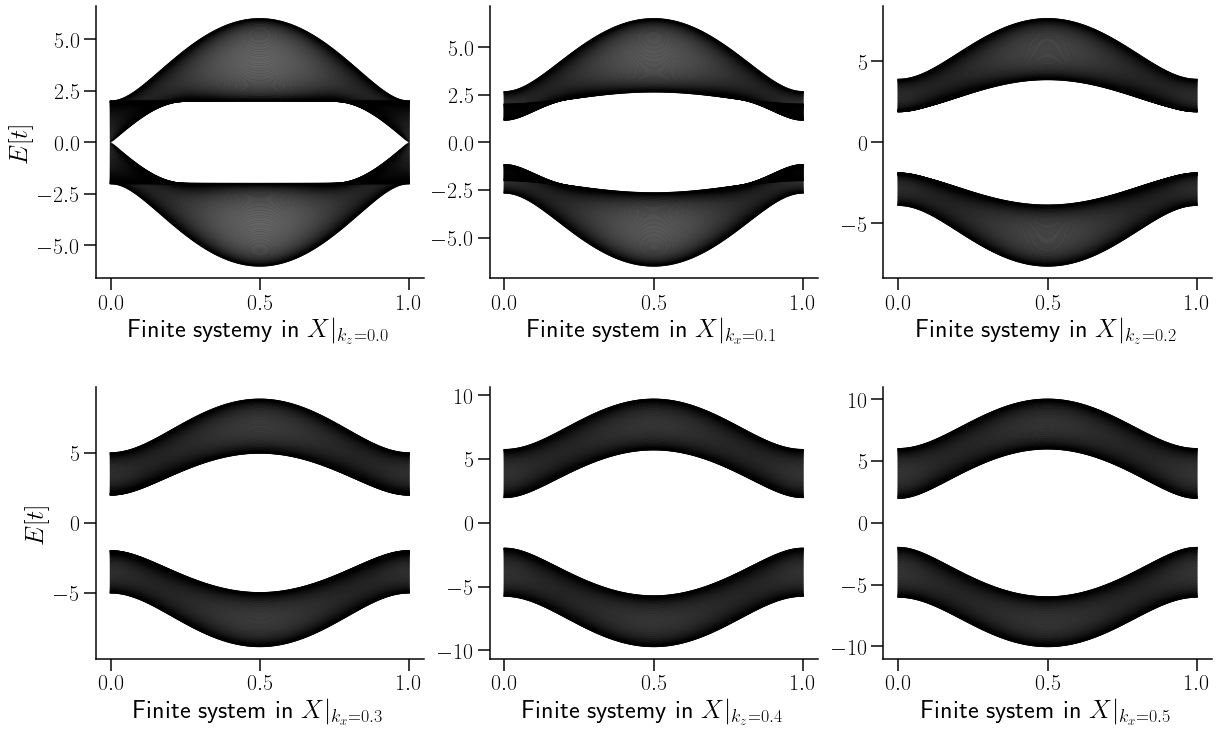

In [23]:
fig,ax=plt.subplots(ncols=3,nrows=2,figsize=(20,12),
                       gridspec_kw = {'wspace':0.2, 'hspace':0.4, 'width_ratios': [1,1,1]})
for n in range(0, len(EkfinX10)):
    
    ax[0,0].plot(k_dist,EkfinX10[n,:], c='black', alpha=0.6) #la long de Ek fin tiene todo
    ax[0,1].plot(k_dist,EkfinX11[n,:], c='black', alpha=0.6)
    ax[0,2].plot(k_dist,EkfinX12[n,:], c='black', alpha=0.6)#la long de Ek fin tiene todo
    ax[1,0].plot(k_dist,EkfinX13[n,:], c='black', alpha=0.6) 
    ax[1,1].plot(k_dist,EkfinX14[n,:], c='black', alpha=0.6) 
    ax[1,2].plot(k_dist,EkfinX15[n,:], c='black', alpha=0.6)
    
for i in range(0,2):
    for j in range(0,3):
        ax[i,j].spines['right'].set_visible(False)
        ax[i,j].spines['top'].set_visible(False)

ax[0,0].set_ylabel(r"$E[t]$",fontsize=26)
ax[1,0].set_ylabel(r"$E[t]$",fontsize=26)

ax[0,0].set_xlabel(r"Finite systemy in $X|_{k_z=0.0}$",fontsize=26)
ax[0,1].set_xlabel(r"Finite system in $X|_{k_x=0.1}$",fontsize=26)
ax[0,2].set_xlabel(r"Finite systemy in $X|_{k_z=0.2}$",fontsize=26)
ax[1,0].set_xlabel(r"Finite system in $X|_{k_x=0.3}$",fontsize=26)
ax[1,1].set_xlabel(r"Finite systemy in $X|_{k_z=0.4}$",fontsize=26)
ax[1,2].set_xlabel(r"Finite system in $X|_{k_x=0.5}$",fontsize=26)



Como se puede denotar en la figura anterior, la variación de $k_z$ sila como evolucuiona la relacion de dispersion a lo alrgo de la primera mitad de la zona de Brillouin.

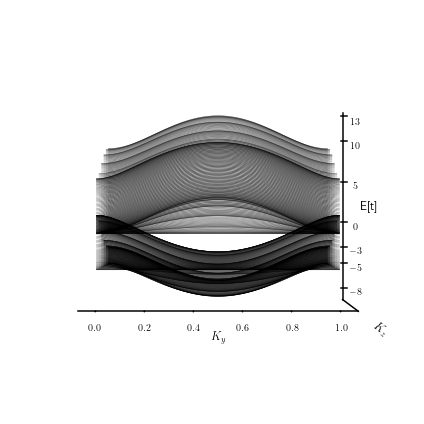

In [9]:
fig=plt.figure(figsize=(12,6))
ax=fig.add_subplot(projection="3d")

# make the panes transparent
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
x=k_dist

x=k_dist
y=k_dist
y1=zeros(len(k_dist))
y2=zeros(len(k_dist))+0.25
x2=k_dist*10-2.5
X, Y=meshgrid(x,y)
for n in range(len(EkfinX10)):
    ax.plot(x,y1, EkfinX10[n,:], c="black", alpha=0.6,linewidth=0.4)
    ax.plot(x,y1+0.1, EkfinX11[n,:], c="black", alpha=0.2, linewidth=0.4)
    ax.plot(x,y1+0.2, EkfinX12[n,:], c="black", alpha=0.3, linewidth=0.4)
    ax.plot(x,y1+0.3, EkfinX13[n,:], c="black", alpha=0.3, linewidth=0.4)
    ax.plot(x,y1+0.4, EkfinX14[n,:], c="black", alpha=0.3, linewidth=0.4)
    ax.plot(x,y1+0.5, EkfinX15[n,:], c="black", alpha=0.3, linewidth=0.4)
  
#     ax.plot(y1+1,x, EkfinY2[n,:], c="red", alpha=0.5)
#     ax.plot(x,EkfinZ[n,:],y1, c="black", alpha=0.5)
ax.set_xlabel("$K_y$")
ax.set_ylabel("$K_z$")
ax.set_zlabel("E[t]")

ax.set_yticks([])
ax.set_zticks([-8,-5,-3,0,5,10, 13])
plt.tight_layout()
ax.view_init(0, -90)
savefig("Planes_Y_TII.pdf")

## Exploración de la estructura de bandas en el material finito en Y

In [27]:
###-------Finito en Y-------#     
z=0.
k=[[0,z],[0.5,z],[1.0,z]]
(k_vec,k_dist,k_node)=NY_WSM.k_path(k,101, report=False)
EkfinY10=NY_WSM.solve_all(k_vec)

z=0.025
k=[[0,z],[0.5,z],[1.0,z]]
(k_vec,k_dist,k_node)=NY_WSM.k_path(k,101, report=False)
EkfinY11=NY_WSM.solve_all(k_vec)

z=0.1
k=[[0,z],[0.5,z],[1.0,z]]
(k_vec,k_dist,k_node)=NY_WSM.k_path(k,101, report=False)
EkfinY12=NY_WSM.solve_all(k_vec)

z=0.25
k=[[0,z],[0.5,z],[1.0,z]]
(k_vec,k_dist,k_node)=NY_WSM.k_path(k,101, report=False)
EkfinY13=NY_WSM.solve_all(k_vec)

z=0.4
k=[[0,z],[0.5,z],[1.0,z]]
(k_vec,k_dist,k_node)=NY_WSM.k_path(k,101, report=False)
EkfinY14=NY_WSM.solve_all(k_vec)

z=0.5
k=[[0,z],[0.5,z],[1.0,z]]
(k_vec,k_dist,k_node)=NY_WSM.k_path(k,101, report=False)
EkfinY15=NY_WSM.solve_all(k_vec)



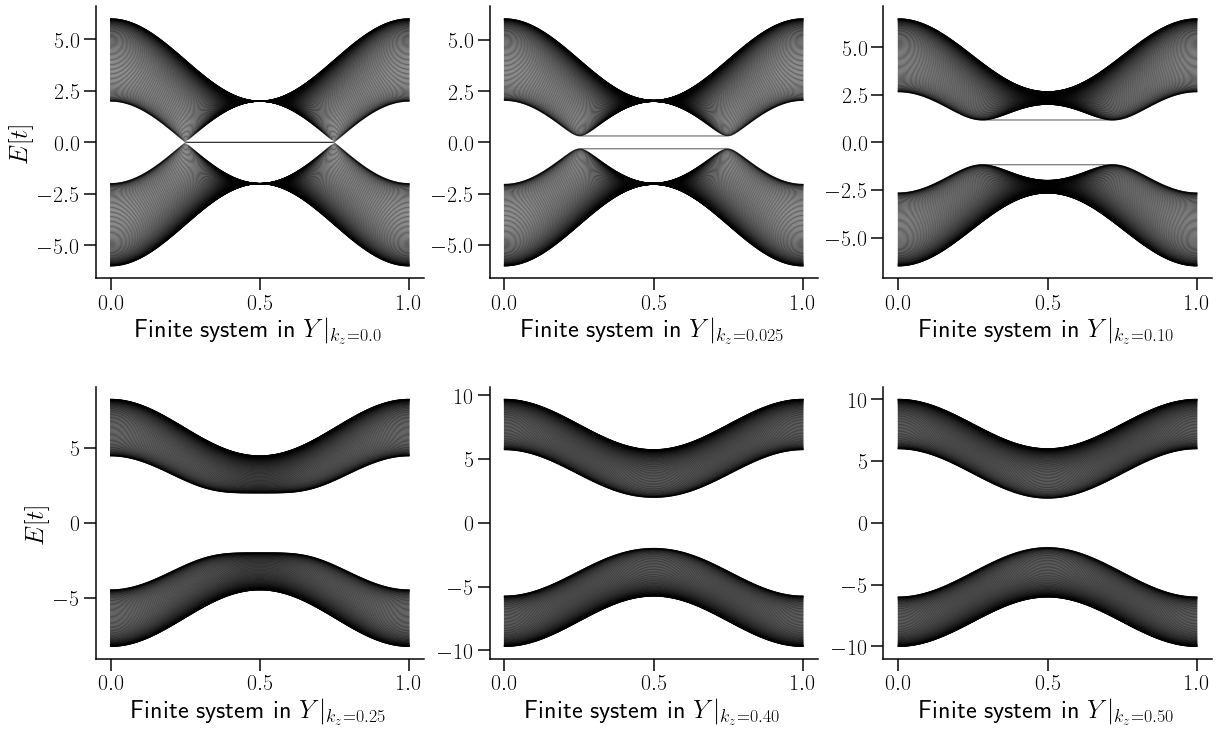

In [28]:
fig,ax  = plt.subplots(ncols=3,nrows=2,figsize=(20,12),
                       gridspec_kw = {'wspace':0.2, 'hspace':0.4, 'width_ratios': [1,1,1]})
for n in range(0, len(EkfinY10)):
    
    ax[0,0].plot(k_dist,EkfinY10[n,:], c='black', alpha=0.6,linewidth=1.1) #la long de Ek fin tiene todo
    ax[0,1].plot(k_dist,EkfinY11[n,:], c='black', alpha=0.6,linewidth=1.1)
    ax[0,2].plot(k_dist,EkfinY12[n,:], c='black', alpha=0.6,linewidth=1.1)#la long de Ek fin tiene todo
    ax[1,0].plot(k_dist,EkfinY13[n,:], c='black', alpha=0.6,linewidth=1.1) 
    ax[1,1].plot(k_dist,EkfinY14[n,:], c='black', alpha=0.6,linewidth=1.1 )
    ax[1,2].plot(k_dist,EkfinY15[n,:], c='black', alpha=0.6,linewidth=1.1)
    
for i in range(0,2):
    for j in range(0,3):
        ax[i,j].spines['right'].set_visible(False)
        ax[i,j].spines['top'].set_visible(False)

ax[0,0].set_ylabel(r"$E[t]$",fontsize=26)
ax[1,0].set_ylabel(r"$E[t]$",fontsize=26)

ax[0,0].set_xlabel(r"Finite system in $Y|_{k_z=0.0}$",fontsize=26)
ax[0,1].set_xlabel(r"Finite system in $Y|_{k_z=0.025}$",fontsize=26)
ax[0,2].set_xlabel(r"Finite system in $Y|_{k_z=0.10}$",fontsize=26)
ax[1,0].set_xlabel(r"Finite system in $Y|_{k_z=0.25}$",fontsize=26)
ax[1,1].set_xlabel(r"Finite system in $Y|_{k_z=0.40}$",fontsize=26)
ax[1,2].set_xlabel(r"Finite system in $Y|_{k_z=0.50}$",fontsize=26)
savefig("Perfil_Capas_WSM_TII.pdf", bbox_inches="tight")

Se denota cómo los arcos de Fermi van evolucionando conforme se avanza en la zona de Brillouin. Si este avabce se hiciera continuo se formarian dos planos interceptados extactamente en el arco de Fermi. Dichos planos corresponderian a la superficie de Fermi.

In [48]:
###-------Finito en Y-------#     
z=0.
k=[[0,z],[0.5,z],[1.0,z]]
(k_vec,k_dist,k_node)=NY_WSM.k_path(k,101, report=False)
EkfinY10=NY_WSM.solve_all(k_vec)

z=0.1
k=[[0,z],[0.5,z],[1.0,z]]
(k_vec,k_dist,k_node)=NY_WSM.k_path(k,101, report=False)
EkfinY11=NY_WSM.solve_all(k_vec)

z=0.2
k=[[0,z],[0.5,z],[1.0,z]]
(k_vec,k_dist,k_node)=NY_WSM.k_path(k,101, report=False)
EkfinY12=NY_WSM.solve_all(k_vec)

z=0.3
k=[[0,z],[0.5,z],[1.0,z]]
(k_vec,k_dist,k_node)=NY_WSM.k_path(k,101, report=False)
EkfinY13=NY_WSM.solve_all(k_vec)

z=0.4
k=[[0,z],[0.5,z],[1.0,z]]
(k_vec,k_dist,k_node)=NY_WSM.k_path(k,101, report=False)
EkfinY14=NY_WSM.solve_all(k_vec)

z=0.5
k=[[0,z],[0.5,z],[1.0,z]]
(k_vec,k_dist,k_node)=NY_WSM.k_path(k,101, report=False)
EkfinY15=NY_WSM.solve_all(k_vec)



<IPython.core.display.Javascript object>


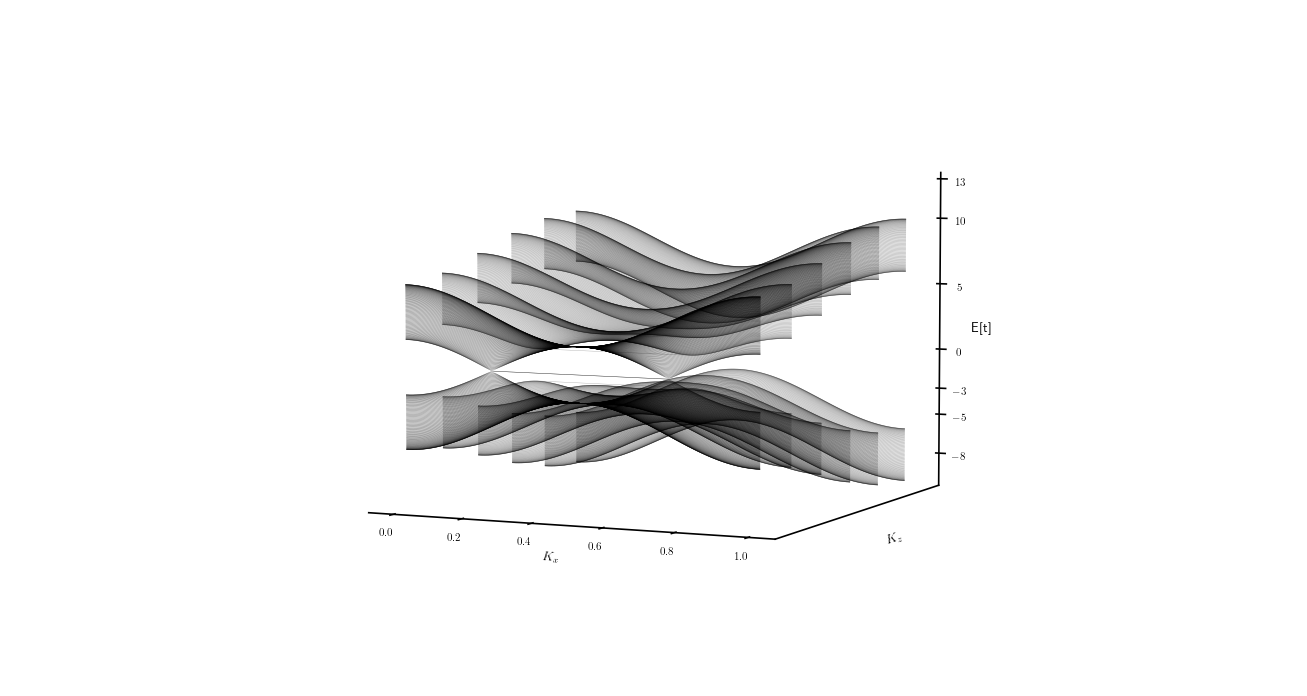

In [31]:
fig=plt.figure(figsize=(15,8))
ax=fig.add_subplot(projection="3d")
# make the panes transparent
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
x=k_dist
y=k_dist
y1=zeros(len(k_dist))
y2=zeros(len(k_dist))+0.25
x2=k_dist*10-2.5
X, Y=meshgrid(x,y)
for n in range(len(EkfinY10)):
    ax.plot(x,y1, EkfinY10[n,:], c="black", alpha=0.5,linewidth=0.4)
    ax.plot(x,y1+0.1, EkfinY11[n,:], c="black", alpha=0.3, linewidth=0.4)
    ax.plot(x,y1+0.2, EkfinY12[n,:], c="black", alpha=0.3, linewidth=0.4)
    ax.plot(x,y1+0.3, EkfinY13[n,:], c="black", alpha=0.3, linewidth=0.4)
    ax.plot(x,y1+0.4, EkfinY14[n,:], c="black", alpha=0.3, linewidth=0.4)
    ax.plot(x,y1+0.5, EkfinY15[n,:], c="black", alpha=0.3, linewidth=0.4)
  
#     ax.plot(y1+1,x, EkfinY2[n,:], c="red", alpha=0.5)
#     ax.plot(x,EkfinZ[n,:],y1, c="black", alpha=0.5)
ax.set_xlabel("$K_x$")
ax.set_ylabel("$K_z$")
ax.set_zlabel("E[t]")

ax.set_yticks([])
ax.set_zticks([-8,-5,-3,0,5,10, 13])
plt.tight_layout()
ax.view_init(0, -90)
savefig("Planes_Z_TII.pdf")

Como se puede denotar en la figura anterior, la variación de $k_z$ sila como evolucuiona la relacion de dispersion a lo alrgo de la primera mitad de la zona de Brillouin.

## Exploración de la estructura de bandas en el material finito en Z

In [24]:
z=0
k=[[z,0],[z,0.5],[z,1.0]]
(k_vec,k_dist,k_node)=NZ_WSM.k_path(k,101, report=False)
EkfinZ10=NZ_WSM.solve_all(k_vec)

z=0.1
k=[[z,0],[z,0.5],[z,1.0]]
(k_vec,k_dist,k_node)=NZ_WSM.k_path(k,101, report=False)
EkfinZ11=NZ_WSM.solve_all(k_vec)

z=0.2
k=[[z,0],[z,0.5],[z,1.0]]
(k_vec,k_dist,k_node)=NZ_WSM.k_path(k,101, report=False)
EkfinZ12=NZ_WSM.solve_all(k_vec)

z=0.3
k=[[z,0],[z,0.5],[z,1.0]]
(k_vec,k_dist,k_node)=NZ_WSM.k_path(k,101, report=False)
EkfinZ13=NZ_WSM.solve_all(k_vec)

z=0.4
k=[[z,0],[z,0.5],[z,1.0]]
(k_vec,k_dist,k_node)=NZ_WSM.k_path(k,101, report=False)
EkfinZ14=NZ_WSM.solve_all(k_vec)

z=0.5
k=[[z,0],[z,0.5],[z,1.0]]
(k_vec,k_dist,k_node)=NZ_WSM.k_path(k,101, report=False)
EkfinZ15=NZ_WSM.solve_all(k_vec)


Text(0.5, 0, 'Finite system in $Z|_{k_x=0.5}$')

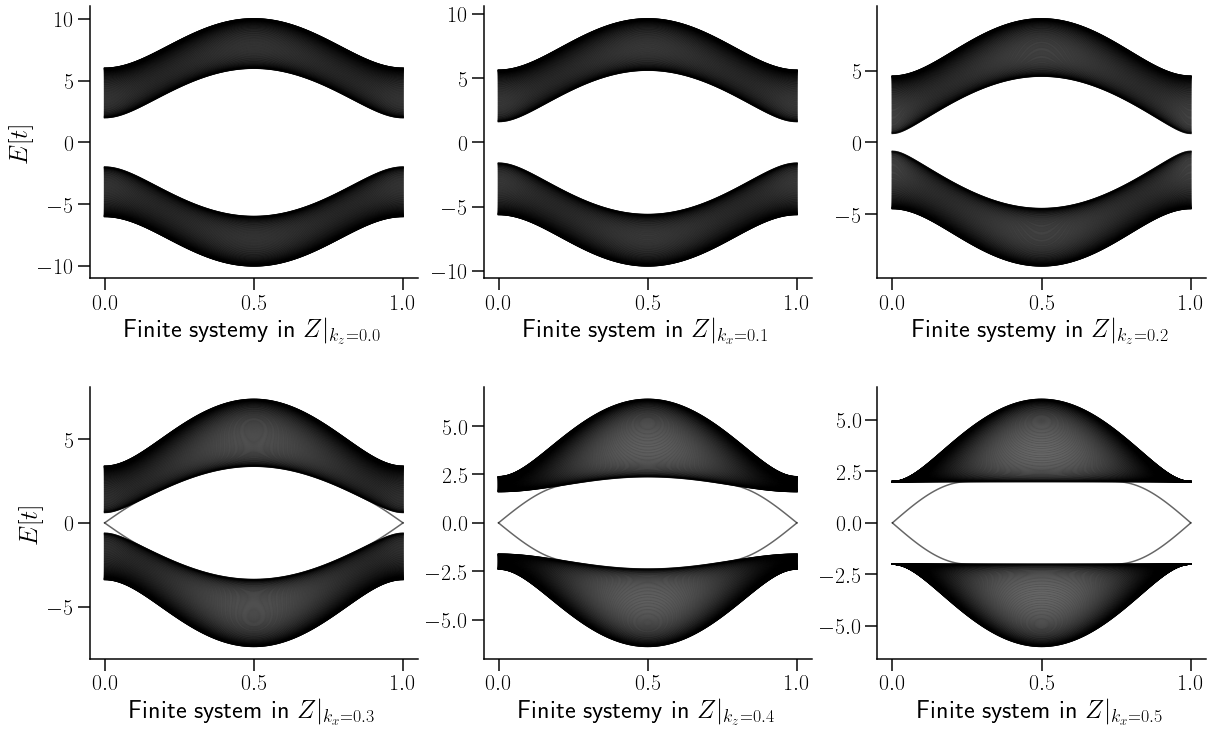

In [25]:
fig,ax=plt.subplots(ncols=3,nrows=2,figsize=(20,12),
                       gridspec_kw = {'wspace':0.2, 'hspace':0.4, 'width_ratios': [1,1,1]})
for n in range(0, len(EkfinX10)):
    
    ax[0,0].plot(k_dist,EkfinZ10[n,:], c='black', alpha=0.6) #la long de Ek fin tiene todo
    ax[0,1].plot(k_dist,EkfinZ11[n,:], c='black', alpha=0.6)
    ax[0,2].plot(k_dist,EkfinZ12[n,:], c='black', alpha=0.6)#la long de Ek fin tiene todo
    ax[1,0].plot(k_dist,EkfinZ13[n,:], c='black', alpha=0.6) 
    ax[1,1].plot(k_dist,EkfinZ14[n,:], c='black', alpha=0.6) 
    ax[1,2].plot(k_dist,EkfinZ15[n,:], c='black', alpha=0.6)
    
for i in range(0,2):
    for j in range(0,3):
        ax[i,j].spines['right'].set_visible(False)
        ax[i,j].spines['top'].set_visible(False)

ax[0,0].set_ylabel(r"$E[t]$",fontsize=26)
ax[1,0].set_ylabel(r"$E[t]$",fontsize=26)

ax[0,0].set_xlabel(r"Finite systemy in $Z|_{k_z=0.0}$",fontsize=26)
ax[0,1].set_xlabel(r"Finite system in $Z|_{k_x=0.1}$",fontsize=26)
ax[0,2].set_xlabel(r"Finite systemy in $Z|_{k_z=0.2}$",fontsize=26)
ax[1,0].set_xlabel(r"Finite system in $Z|_{k_x=0.3}$",fontsize=26)
ax[1,1].set_xlabel(r"Finite systemy in $Z|_{k_z=0.4}$",fontsize=26)
ax[1,2].set_xlabel(r"Finite system in $Z|_{k_x=0.5}$",fontsize=26)


In [21]:
z=0
k=[[z,0],[z,0.5],[z,1.0]]
(k_vec,k_dist,k_node)=NZ_WSM.k_path(k,101, report=False)
EkfinZ10=NZ_WSM.solve_all(k_vec)

z=0.1
k=[[z,0],[z,0.5],[z,1.0]]
(k_vec,k_dist,k_node)=NZ_WSM.k_path(k,101, report=False)
EkfinZ11=NZ_WSM.solve_all(k_vec)

z=0.2
k=[[z,0],[z,0.5],[z,1.0]]
(k_vec,k_dist,k_node)=NZ_WSM.k_path(k,101, report=False)
EkfinZ12=NZ_WSM.solve_all(k_vec)

z=0.3
k=[[z,0],[z,0.5],[z,1.0]]
(k_vec,k_dist,k_node)=NZ_WSM.k_path(k,101, report=False)
EkfinZ13=NZ_WSM.solve_all(k_vec)

z=0.4
k=[[z,0],[z,0.5],[z,1.0]]
(k_vec,k_dist,k_node)=NZ_WSM.k_path(k,101, report=False)
EkfinZ14=NZ_WSM.solve_all(k_vec)

z=0.5
k=[[z,0],[z,0.5],[z,1.0]]
(k_vec,k_dist,k_node)=NZ_WSM.k_path(k,101, report=False)
EkfinZ15=NZ_WSM.solve_all(k_vec)


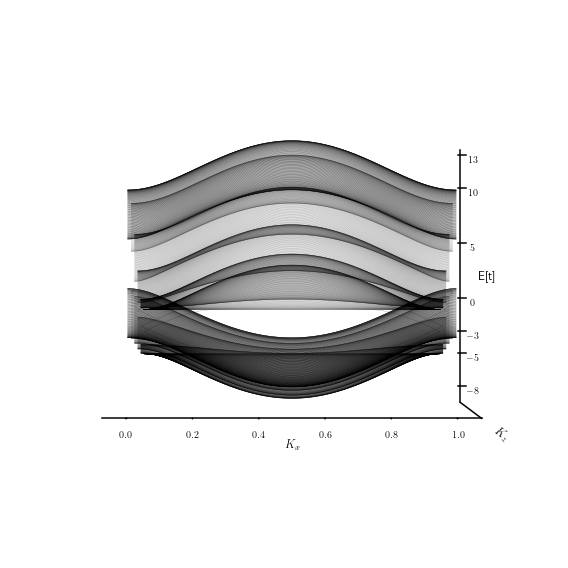

In [22]:

fig=plt.figure(figsize=(15,8))
ax=fig.add_subplot(projection="3d")
# make the panes transparent
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
x=k_dist
y=k_dist
y1=zeros(len(k_dist))
y2=zeros(len(k_dist))+0.25
x2=k_dist*10-2.5
X, Y=meshgrid(x,y)
for n in range(len(EkfinZ10)):
    ax.plot(x,y1, EkfinZ10[n,:], c="black", alpha=0.6,linewidth=0.4)
    ax.plot(x,y1+0.1, EkfinZ11[n,:], c="black", alpha=0.2, linewidth=0.4)
    ax.plot(x,y1+0.2, EkfinZ12[n,:], c="black", alpha=0.3, linewidth=0.4)
    ax.plot(x,y1+0.3, EkfinZ13[n,:], c="black", alpha=0.3, linewidth=0.4)
    ax.plot(x,y1+0.4, EkfinZ14[n,:], c="black", alpha=0.3, linewidth=0.4)
    ax.plot(x,y1+0.5, EkfinZ15[n,:], c="black", alpha=0.3, linewidth=0.4)
  
#     ax.plot(y1+1,x, EkfinY2[n,:], c="red", alpha=0.5)
#     ax.plot(x,EkfinZ[n,:],y1, c="black", alpha=0.5)
ax.set_xlabel("$K_x$")
ax.set_ylabel("$K_z$")
ax.set_zlabel("E[t]")

ax.set_yticks([])
ax.set_zticks([-8,-5,-3,0,5,10, 13])
plt.tight_layout()
ax.view_init(0, -90)
savefig("Planes_X_TI.pdf")

## Density of States fo WSM-TI- Histogram

Una herramienta util para explorar las propiedadfes electroncias de un material es la densidad de estados (DOS). Dicha heramienta nos permitira elucidar la cantidad de estados que hay en los arcos de Fermi en proporción con los que hay en el bulto del material.

#### For a infinite system

In [26]:

# calculate density of states
# first solve the model on a mesh and return all energies
PR        = 101
kx,ky,kz  = linspace(0,1,PR),linspace(0,1,PR),linspace(0,1,PR)
KX,KY,KZ  = meshgrid(kx,ky,kz)
KX,KY,KZ  = KX.flatten(),KY.flatten(),KZ.flatten()
K         = column_stack((KX,KY,KZ))
# solve the model on this mesh
Edos=WSH.solve_all(K)
# flatten completely the matrixk_dist
Edos=Edos.flatten()



#### For a finite system

In [27]:
L     = 100 #Numero de celdas
N_WSM = WSH.cut_piece(L,1,glue_edgs=False) #numero de reps, en la direccion 0x,1y,2z, mi sistema se redujo dimensionalmente
                                            #modo rebanada de jamón


In [28]:
# calculate density of states
# first solve the model on a mesh and return all energies
PR    = 101
kx,ky = linspace(0,1,PR),linspace(0,1,PR)
KX,KY = meshgrid(kx,ky)
KX,KY = KX.flatten(),KY.flatten()
Kf         = column_stack((KX,KY))
# solve the model on this mesh
Ekf=N_WSM.solve_all(Kf)
# flatten completely the matrix
Ekf=Ekf.flatten()



#### Comparing DOS for a finite system vs a infinite system

Plotting DOS...
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.53 µs


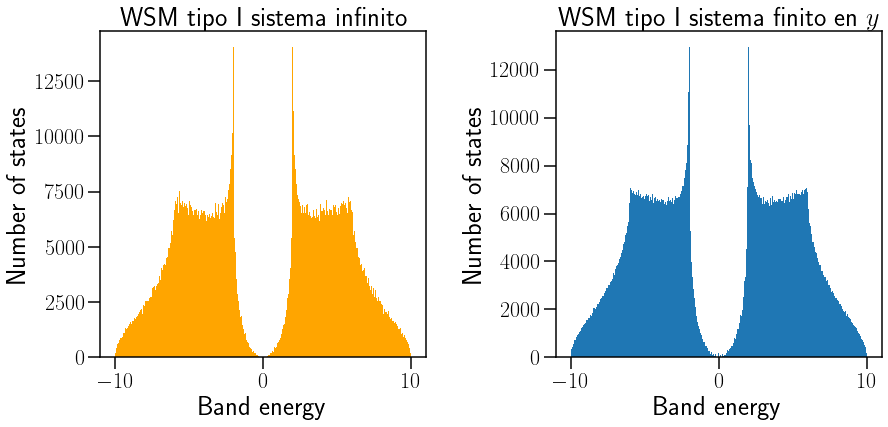

In [34]:

# plotting DOS
print('Plotting DOS...')
# now plot density of states
fig, ax = plt.subplots(1,2,figsize=(14, 6),
                       gridspec_kw = {'wspace':0.4, 'hspace':0, 'width_ratios': [1, 1]})

ax[0].hist(Edos,501, color="orange")
ax[0].set_title("WSM tipo I sistema infinito")
ax[0].set_xlabel("Band energy")
ax[0].set_ylabel("Number of states")

ax[1].hist(Ekf,501)
ax[1].set_title("WSM tipo I sistema finito en $y$")
ax[1].set_xlabel("Band energy")
ax[1].set_ylabel("Number of states")


# make an PDF figure of a plot

%time

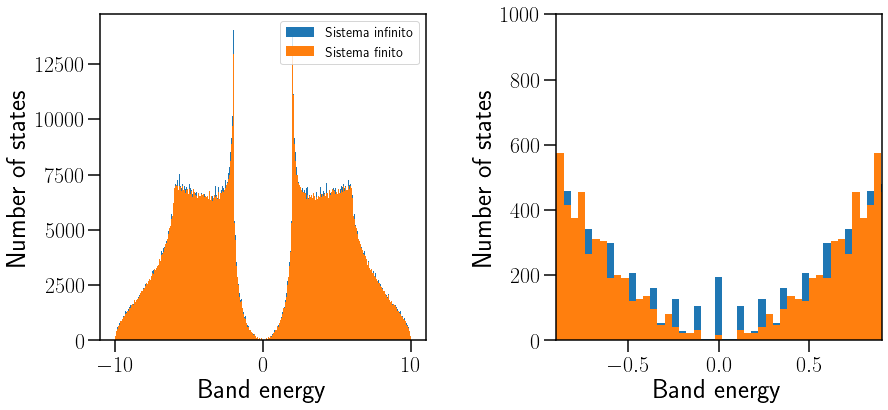

In [44]:
fig, ax = plt.subplots(1,2,figsize=(14, 6),
                       gridspec_kw = {'wspace':0.4, 'hspace':0, 'width_ratios': [1, 1]})

ax[0].hist(Edos,501,label="Sistema infinito")
ax[0].hist(Ekf,501,label="Sistema finito")
ax[0].legend(loc=0,fontsize=14)
ax[0].set_xlabel("Band energy")
ax[0].set_ylabel("Number of states")

ax[1].hist(Ekf,501)
ax[1].hist(Edos,501)


ax[1].set_xlabel("Band energy")
ax[1].set_ylabel("Number of states")
ax[1].set_ylim([0,1000])
ax[1].set_xlim([-0.9,0.9])


savefig("DOS-Fin-vs-DOS-Inf.pdf")

Se puede denotar cómo los arcos de Fermi sólo aparecen cuando el sistema tiene bordes, es decir, cuando se rompe la simetría de traslación.

## Densidad de estados usando Funciones de Green.

La función de Green es uan herramienta matematica que nos permite obtener la DOS de un hamiltoniano independiente del tiempo. A diferencia de los histogramas, tiene la ventaja de que genera curvas suaves.

In [41]:
Et=linspace(-10,13,1001)
def G(Edos):
    GreenP = []
    f      = 0.01 #al aumentarlo, mejora la fidelidad al hsitograma
    for i in Et:
        g  = sum(1/(i+f*1J-Edos))
        GreenP.append(g)
    GreenM = []

    for i in Et:
        g  = sum(1/(i-f*1J-Edos))
        GreenM.append(g)
    N    = 2*pi*PR**3
    GIP  = -imag(GreenP)/N
    GRP  = real(GreenP)/N
#     GIM  = imag(GreenM)/N
#     GRM  = real(GreenM)/N
    return GIP, GRP
     

In [42]:
G_f,G_inf=G(Edos),G(Ekf)

Plotting DOS...
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.53 µs


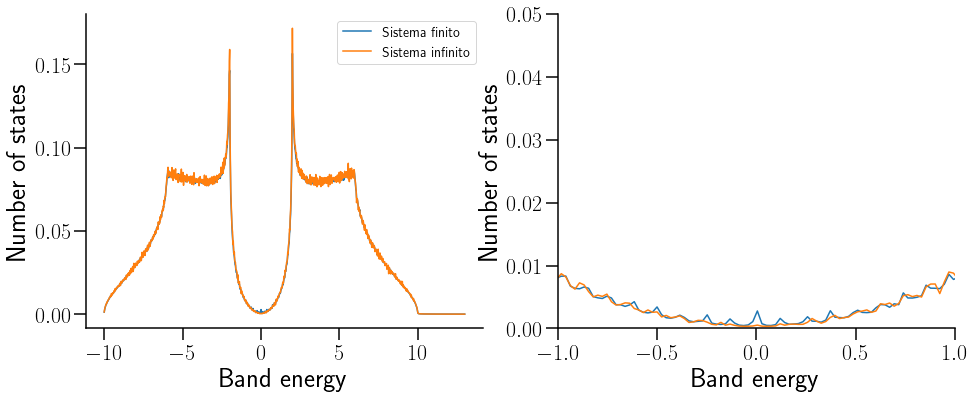

In [43]:

# plotting DOS
print('Plotting DOS...')

# now plot density of states ax.legend(loc=0,fontsize=14)
fig, ax = plt.subplots(1,2,figsize=(14, 6) )

ax[0].plot(Et,G_inf[0],label="Sistema finito")
ax[0].plot(Et,G_f[0],label="Sistema infinito")
ax[0].set_xlabel("Band energy")
ax[0].set_ylabel("Number of states")

ax[1].plot(Et,G_inf[0])
ax[1].plot(Et,G_f[0])

ax[1].set_xlim([-1,1])
ax[1].set_ylim([0,0.05])

ax[0].legend(loc=0,fontsize=14)

ax[1].set_xlabel("Band energy")
ax[1].set_ylabel("Number of states")
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
#A.u. cuando está normalizada
#Estados por unidad de área y u de energía
# savefig("Green_fuc_DOS")

Se puede denotar cómo los arcos de Fermi sólo aparecen cuando el sistema tiene bordes, es decir, cuando se rompe la simetría de traslación.

### Densidad de esatdos acomplada con la estructura de bandas

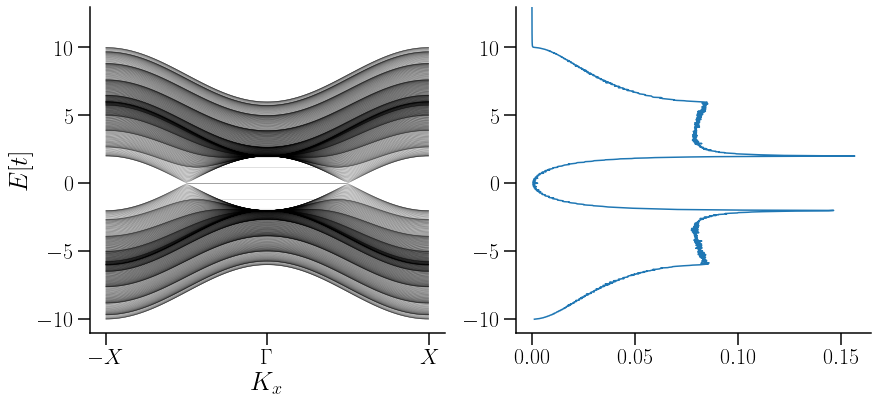

In [50]:
fig,ax  = plt.subplots(ncols=2,nrows=1,figsize=(14.0,6),
                       gridspec_kw = {'wspace':0.2, 'hspace':0, 'width_ratios': [ 1,1]})
x=linspace(0,1,101)
for n in range(len(EkfinY10)):
    ax[0].plot(x ,EkfinY10[n,:], c="black", alpha=0.5,linewidth=0.4)
    ax[0].plot(x ,EkfinY11[n,:], c="black", alpha=0.3, linewidth=0.4)
    ax[0].plot(x,EkfinY12[n,:], c="black", alpha=0.3, linewidth=0.4)
    ax[0].plot(x, EkfinY13[n,:], c="black", alpha=0.3, linewidth=0.4)
    ax[0].plot(x, EkfinY14[n,:], c="black", alpha=0.3, linewidth=0.4)
    ax[0].plot(x, EkfinY15[n,:], c="black", alpha=0.3, linewidth=0.4)
  
#la long de Ek fin tiene todo
ax[0].set_xticks(k_node) # puntos de alta simetria, valor que correspomde en k_path
ax[0].set_xticklabels(k_label )
for i in range(0,2):
    
    
    ax[i].set_ylim(-11,13)
    # xsticklabels(k_label) 

    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
ax[0].set_ylabel(r"$E[t]$",fontsize=26)
ax[0].set_xlabel(r"$K_x$",fontsize=26)

ax[1].plot(G_inf[0],Et)


savefig("Dispersion-DOS_TII.pdf",bbox_inches="tight")

En la figura anterior se puede notar cómo los arcos de Fermi aparecen en una $E[t]=0$. 

In [51]:
trapz(G_f[0], Et)

0.9991432821048173

La celda anterior comprueba que la densidad de estados dada por la función de Green está normalizada.

# IPR

El IPR o Inverse Participation Ratio (IPR, por sus siglas en inglés) es una cantidad que perimte saber qué tan lo laizados están los estados electronicos en un material. En esta sección se presenta un grafico coloreado con el Log|IPR|, de manera que los colores más obsucuros elucidarán qué estados son los más localizados. 

In [52]:
print("building finite sistems")
L=100
NY_WSM=WSH.cut_piece(L,1,glue_edgs=False) #numero de reps, en la direccion 0x,1y,2z, mi sistema se redujo dimensionalmente
                                            #modo rebanada de jamón
# NNYZ_WSM=NY_WSM.cut_piece(L,2,glue_edgs=False)
# NNYX_WSM=NY_WSM.cut_piece(L,0,glue_edgs=False)

building finite sistems


In [53]:
print("Extracting eigenvectors and eigenvalues")
a=1
k = [[0,0],[a/2,0],[a,0]]                              #unidades en unidades de V de red 1=2pi/a
k_label1=[r"$\Gamma$","X",r"$\Gamma$"]
(k_vec,k_dist,k_node)=NY_WSM.k_path(k,501, report=False)
Ekfin2YZ, ψk1=NY_WSM.solve_all(k_vec,eig_vectors=True)
# savez_compressed("Data_YZ_γ={}".format(γ), Dk=k_dist,DEk=Ekfin2YZ, U=ψk1)
# k = [[0],[a/2],[a]]                              #unidades en unidades de V de red 1=2pi/a
# k_label2=[r"$\Gamma$","Z",r"$\Gamma$"]
# (k_vec,k_dist,k_node)=NNYX_WSM.k_path(k,101, report=False)
# Ekfin2YX, ψk2=NNYX_WSM.solve_all(k_vec,eig_vectors=True)
# savez_compressed("Data_YX_γ={}".format(γ), D_k=k_dist,D_Ek=Ekfin2YX, U=ψk2)

Extracting eigenvectors and eigenvalues


In [54]:
print("Calculating IPR")
nBands,nkpts,nsites= shape(ψk1)
Ik1     = []
index = []
for i in range(nBands):
    In = []
    for j in range(nkpts):
        eigvec=ψk1[i,j]
        suma4= vdot(eigvec*eigvec, eigvec*eigvec)
        suma2= vdot(eigvec,eigvec)
        In.append(real(suma4/suma2))

    Ik1.append(In)
Ik1 = array(Ik1)
savez_compressed("Data_Ik1_γ={}".format(γ),D_Ik1=Ik1)

Calculating IPR


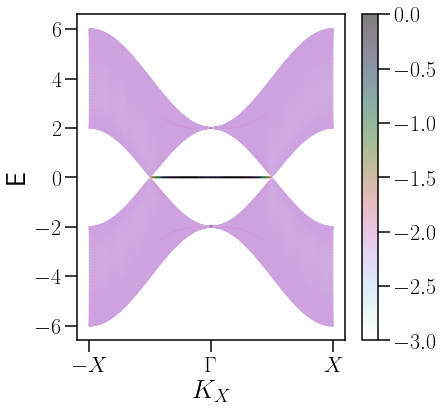

In [55]:
fig,ax   = plt.subplots(ncols = 1,nrows = 1, figsize = (6,6)) #
for n in range(len(Ekfin2YZ)):
    Ekval=Ekfin2YZ[n,:]
    amp  =Ik1[n,:]
    cmap = ax.scatter(k_dist,Ekval,c =log10(amp), cmap = 'cubehelix_r',s = 0.5, alpha=0.5,vmax=0, vmin=-3,rasterized=True)
ax.set_xticks(k_node) # puntos de alta simetria, valor que correspomde en k_path
ax.set_xticklabels(k_label)
ax.set_xlabel(r"$K_X$")
ax.set_ylabel("E")
# ax.set_ylim(-2,2)
fig.colorbar(cmap)
savefig("IPR_Y_γ={}.pdf".format(γ),bbox_inches="tight")


## Interactivo

In [5]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [6]:
#Parámetros


@interact(a=(0,1,0.1),m=(0,1.5,0.1), tx=(0,1.5,0.1),t=(0,1.5,0.1),γ=(0,1.5,0.1))

def WSHTot(a=1.0,m=1.0,tx=0.5, t=0.5, γ=1.5):
    #hopping perpendicular 
    k_0= pi/2
    ##################----------------Inicia TB--------------------#######################
    lat = [[a,0,0],[0,a,0],[0,0,a]]
    orb = [[0,0,0],[1/2,1/2,1/2]] #H, solo los sitios A[000] B1/2[111]
    WSH = tb_model(3,3,lat,orb)
    #DIAGONAL
    #γ*(cos(k_x)-cos(k_0))-2*t*sin(k_z)
    # γ[coskx]
    WSH.set_hop(γ/2, 0, 0,[1,0,0])#de que sitio a que sitio va el hoping, [la exp que lleva ese parametro], Conjugado ya no es 
    # -2tsinkz                                #necesario, está implícito porque es Hermitiano.
    WSH.set_hop(-t/1J, 0, 0,[0,0,1])

    #Hermitiano [1,1]
    WSH.set_hop(γ/2, 1, 1,[1,0,0])
    WSH.set_hop(t/1J, 1, 1,[0,0,1])

    WSH.set_onsite([-γ*cos(k_0),-γ*cos(k_0)]) # No hay hooping, es energia

    #FUERA DE LA DIAGONAL

    # -[m*(2-cos(k_y)-cos(k_z))+2*tx*(cos(k_x)-cos(k_0))]+2J*t*sin(k_y)
    #  2txcosk_0
    WSH.set_hop(-2*m+2*tx*cos(k_0), 0, 1,[0,0,0]) 
    #mcosky+ 2itsin(ky)
    WSH.set_hop(m/2+t, 0, 1,[0,1,0]) 
    WSH.set_hop(m/2-t, 0, 1,[0,-1,0])
    # mcoskz
    WSH.set_hop(m/2, 0, 1,[0,0,1]) 
    WSH.set_hop(m/2, 0, 1,[0,0,-1])
    # tx(coskx)
    WSH.set_hop(-tx, 0, 1,[1,0,0]) 
    WSH.set_hop(-tx, 0, 1,[-1,0,0])


    ###############---------Inicia extraccion de información-----------##############
    k                     = [[-0.5,0,0],[0,0,0.0],[0.5,0,0]] # Punto por los cuales que quiero que pase. Son los punto de al simetria
                                     #unidades en unidades de V de red 1=2pi/a
    k_label               = ["-Z",r"$\Gamma$","Z"]
    (k_vec,k_dist,k_node) = WSH.k_path(k,1001,report=False)
    Ek,U                  = WSH.solve_all(k_vec,eig_vectors=True)

    #######################---Graficos----######################
    pm=plot(k_dist,Ek[0,:])
    pd=plot(k_dist,Ek[1,:])
    xticks(k_node,labels=k_label) # puntos de alta simetria, valor que correspomde en k_path
    # xsticklabels(k_label) 
    xlabel(r"$K_Z$")
    ylabel("E")
    


interactive(children=(FloatSlider(value=1.0, description='a', max=1.0), FloatSlider(value=1.0, description='m'…

## Subplots

In [60]:


def WSHTot(a=1.0,m=1.0,tx=0.5, t=0.5, γ=1.5):
    #hopping perpendicular 
    k_0= pi/2
    ##################----------------Inicia TB--------------------#######################
    lat = [[a,0,0],[0,a,0],[0,0,a]]
    orb = [[0,0,0],[1/2,1/2,1/2]] #H, solo los sitios A[000] B1/2[111]
    WSH = tb_model(3,3,lat,orb)
    #DIAGONAL
    #γ*(cos(k_x)-cos(k_0))-2*t*sin(k_z)
    # γ[coskx]
    WSH.set_hop(γ/2, 0, 0,[1,0,0])#de que sitio a que sitio va el hoping, [la exp que lleva ese parametro], Conjugado ya no es 
    # -2tsinkz                                #necesario, está implícito porque es Hermitiano.
    WSH.set_hop(-t/1J, 0, 0,[0,0,1])

    #Hermitiano [1,1]
    WSH.set_hop(γ/2, 1, 1,[1,0,0])
    WSH.set_hop(t/1J, 1, 1,[0,0,1])

    WSH.set_onsite([-γ*cos(k_0),-γ*cos(k_0)]) # No hay hooping, es energia

    #FUERA DE LA DIAGONAL

    # -[m*(2-cos(k_y)-cos(k_z))+2*tx*(cos(k_x)-cos(k_0))]+2J*t*sin(k_y)
    #  2txcosk_0
    WSH.set_hop(-2*m+2*tx*cos(k_0), 0, 1,[0,0,0]) 
    #mcosky+ 2itsin(ky)
    WSH.set_hop(m/2+t, 0, 1,[0,1,0]) 
    WSH.set_hop(m/2-t, 0, 1,[0,-1,0])
    # mcoskz
    WSH.set_hop(m/2, 0, 1,[0,0,1]) 
    WSH.set_hop(m/2, 0, 1,[0,0,-1])
    # tx(coskx)
    WSH.set_hop(-tx, 0, 1,[1,0,0]) 
    WSH.set_hop(-tx, 0, 1,[-1,0,0])


    ###############---------Inicia extraccion de información-----------##############
    k                     = [[-0.5,0,0],[0,0,0.0],[0.5,0,0]] # Punto por los cuales que quiero que pase. Son los punto de al simetria
                                     #unidades en unidades de V de red 1=2pi/a
    k_label               = ["-X",r"$\Gamma$","X"]
    (k_vec,k_dist,k_node) = WSH.k_path(k,1001,report=False)
    Ek,U                  = WSH.solve_all(k_vec,eig_vectors=True)    

    return (k_dist, Ek, U, k_node, k_label )
    



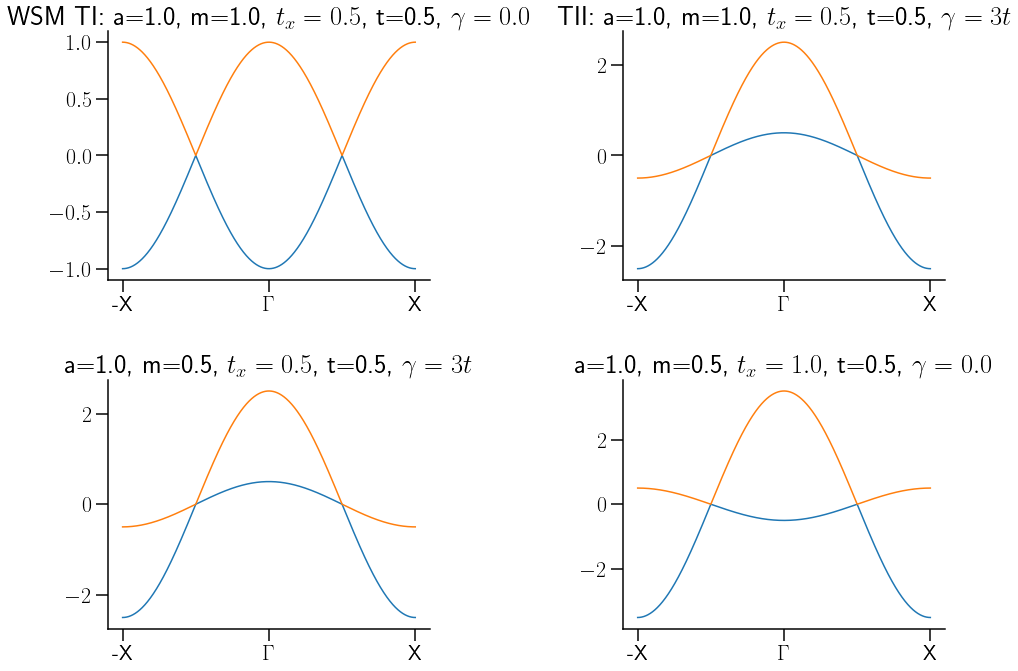

In [72]:
fig, axs = plt.subplots(2, 2,figsize=(15, 11),
                       gridspec_kw = {'wspace':0.6, 'hspace':0.4, 'width_ratios': [1, 1]})


k_dist, Ek, U, k_node, k_label=WSHTot(a=1.0,m=1.0,tx=0.5, t=0.5, γ=0)
axs[0, 0].plot(k_dist,Ek[0])
axs[0, 0].plot(k_dist, Ek[1])
axs[0, 0].set_xticks(k_node)
axs[0, 0].set_xticklabels(k_label)
axs[0, 0].set_title("WSM TI: a=1.0, m=1.0, $t_x=0.5$, t=0.5, $\gamma=0.0$")

k_dist, Ek, U, k_node, k_label=WSHTot(a=1.0,m=1-0,tx=0.5, t=3.5, γ=1.5)
axs[0, 1].plot(k_dist, Ek[0])
axs[0, 1].plot(k_dist, Ek[1])
axs[0, 1].set_xticks(k_node)
axs[0, 1].set_xticklabels(k_label)
axs[0, 1].set_title("TII: a=1.0, m=1.0, $t_x=0.5$, t=0.5, $\gamma=3t$")

k_dist, Ek, U, k_node, k_label=WSHTot(a=1.0,m=0.5,tx=0.5, t=3.0, γ=1.5)
axs[1, 0].plot(k_dist, Ek[0])
axs[1, 0].plot(k_dist, Ek[1])
axs[1, 0].set_xticks(k_node)
axs[1, 0].set_xticklabels(k_label)
axs[1, 0].set_title("a=1.0, m=0.5, $t_x=0.5$, t=0.5, $\gamma=3t$")

k_dist, Ek, U, k_node, k_label=WSHTot(a=1.0,m=0.5,tx=1.0, t=0.5, γ=1.5)
axs[1, 1].plot(k_dist, Ek[0])
axs[1, 1].plot(k_dist, Ek[1])
axs[1, 1].set_xticks(k_node)
axs[1, 1].set_xticklabels(k_label)
axs[1, 1].set_title("a=1.0, m=0.5, $t_x=1.0$, t=0.5, $\gamma=0.0$")

for ax in axs.flat:
    
#     ax.set_xlim(0,2)
#     ax.set_ylim(-4,) 
#     
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
     # puntos de alta simetria, valor que correspomde en k_path
savefig("VarMinModls.pdf",bbox_inches='tight')    
